In [3]:
import os
import pandas
import torch
from torch.utils.data import Dataset, DataLoader # Dataset : to customize own dataset, must have __init__, __len__, __getitem__
                                                 # DataLoader : to set batch size, shuffle and stuff
from torchvision.transforms import Compose, Resize, ToTensor, ToPILImage
from PIL import Image

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [5]:
class wbc_dataset(Dataset): # have Dataset in to tell this class is like torch.utils.data.Dataset, but I will customize it to suit my needs
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform # set transforms to do resize, ToTensor and stuff
        self.images = []
        self.labels = []

        #Load images from all_images folder and assign label 1
        all_dir = os.path.join(image_dir, "all_images")
        for filename in os.listdir(all_dir):
            self.images.append(os.path.join(all_dir, filename))
            self.labels.append(1)

        hem_dir = os.path.join(image_dir, "hem_images")
        for filename in os.listdir(hem_dir):
            self.images.append(os.path.join(hem_dir, filename))
            self.labels.append(0)
    
    def __len__(self):
        return len(self.images)
        
    def __getitem__(self, idx):
        images = self.images[idx]
        image = Image.open(images)
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

Length of dataset : 10661
Label: 1


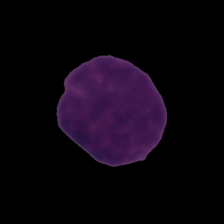

torch.Size([3, 224, 224])
Label: 0


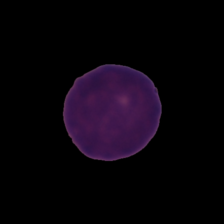

torch.Size([3, 224, 224])
Label: 0


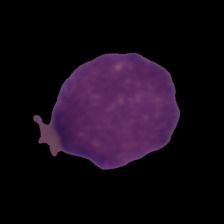

torch.Size([3, 224, 224])


In [6]:
#define transform (ToTensor)
transform = Compose([ToTensor(),
                    Resize((224, 224))
                    ])
to_pil = ToPILImage()

dataset = wbc_dataset(image_dir='/home/kwanho/ALL_classification/training_data/', transform=transform)

print(f"Length of dataset : {len(dataset)}")

for i in range(3):
    image, label = dataset[-i]
    print(f'Label: {label}')

    pil_image = to_pil(image)
    display(pil_image)
    
    print(image.size())

In [7]:
loaders = {'train' : DataLoader(dataset,
                                batch_size=100,
                                shuffle=True,
                                num_workers=1)}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7faaf62a40e0>}

In [ ]:
# CNN Model
class CNN(torch.mm.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.sequential()